# Breast Cancer Detection Using Machine Learning Classifier

by https://vaibhavhariaramani.github.io/ <br>
Project Source: https://github.com/vaibhavhariaramani/Breast_Cancer_Detection_ML-with-Web-End-Deployment <br>
ML Projects: https://github.com/vaibhavhariaramani/Machine-Learning-Projects-and-Tutorials <br>
Blogs : https://vaibhavhariaramani.github.io/blogs/ <br>
Videos: https://www.youtube.com/channel/UCy7amUpLnsRLEMIaJGGBYog

# Import essential libraries 

In [1]:
# import libraries
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import pickle #for dumping the model or we can use joblib library

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
#Load breast cancer dataset
from sklearn.datasets import load_breast_cancer

In [3]:
# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
cancer_dataset = load_breast_cancer()

# Data Manupulation

In [5]:
type(cancer_dataset)

sklearn.utils.Bunch

In [6]:
# keys in dataset
cancer_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# target value name malignant or benign tumor
cancer_dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# description of data
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
# name of features
print(cancer_dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
# location/path of data file
print(cancer_dataset['filename'])

/home/vaibhav/anaconda3/lib/python3.6/site-packages/sklearn/datasets/data/breast_cancer.csv


## Create DataFrame

In [11]:
# create datafrmae
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],
             columns = np.append(cancer_dataset['feature_names'], ['target']))

In [12]:
# DataFrame to CSV file
cancer_df.to_csv('breast_cancer_dataframe.csv')

In [13]:
# Head of cancer DataFrame
cancer_df.head(6) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0


In [14]:
# Tail of cancer DataFrame
cancer_df.tail(6) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,0.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [15]:
# Information of cancer Dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [16]:
# Numerical distribution of data
cancer_df.describe() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Data Visualization

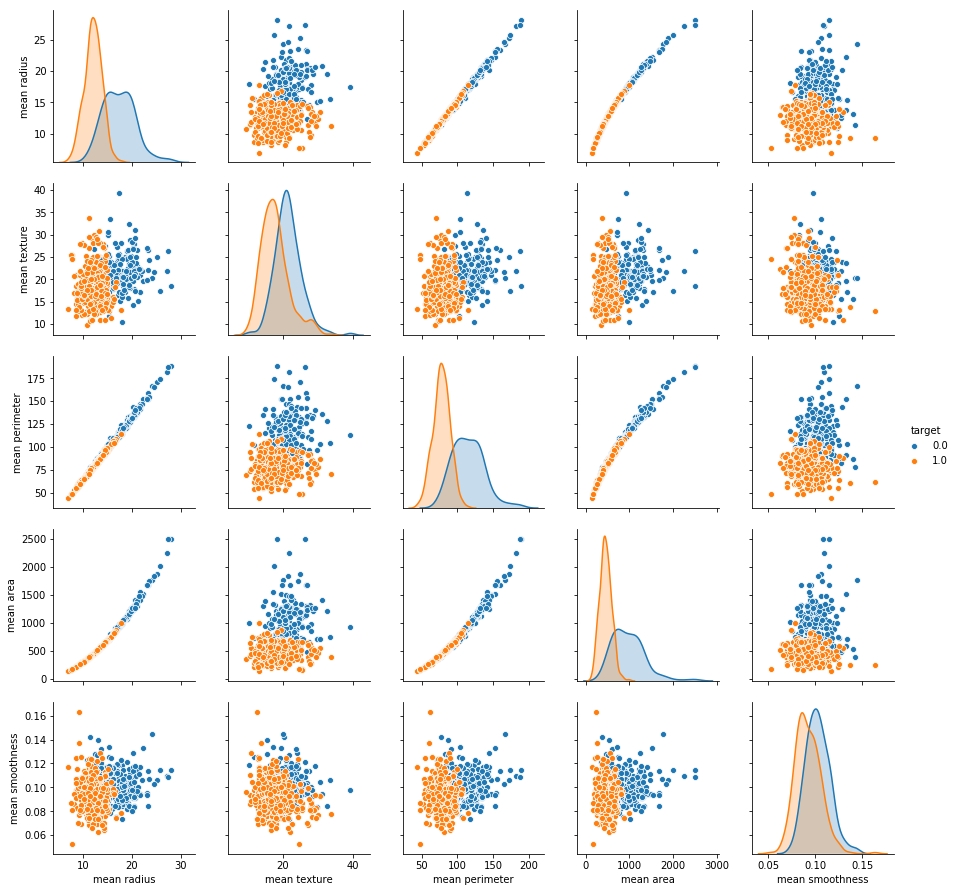

In [18]:
# pair plot of sample feature
sns.pairplot(cancer_df, hue = 'target', 
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] ) # ****** img 5 ***

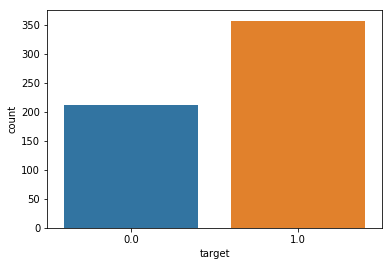

In [19]:
# Count the target class
sns.countplot(cancer_df['target']) #  **************************** img 5 *************************  

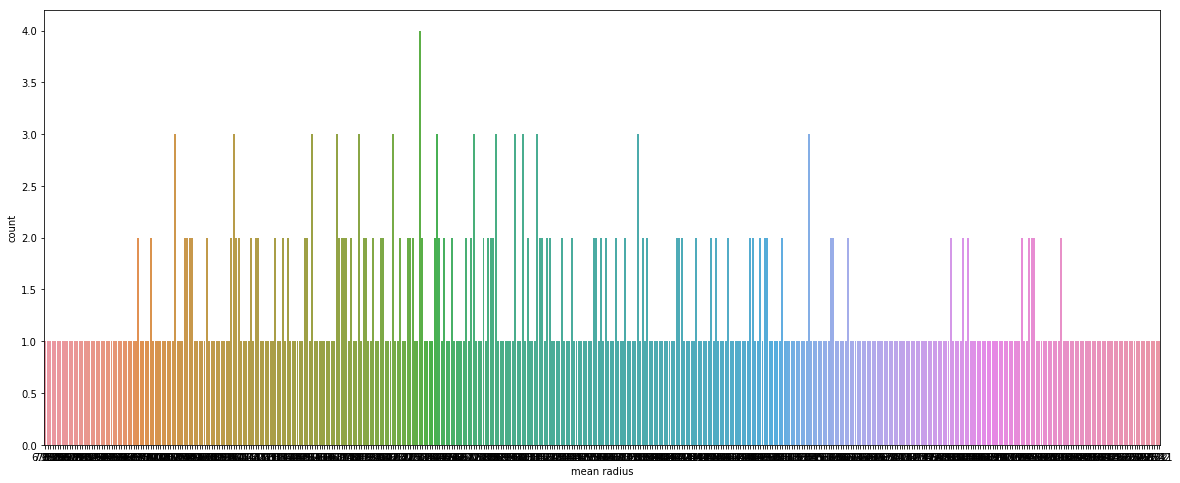

In [20]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(cancer_df['mean radius']) # *** img 7 ****

# Heatmap

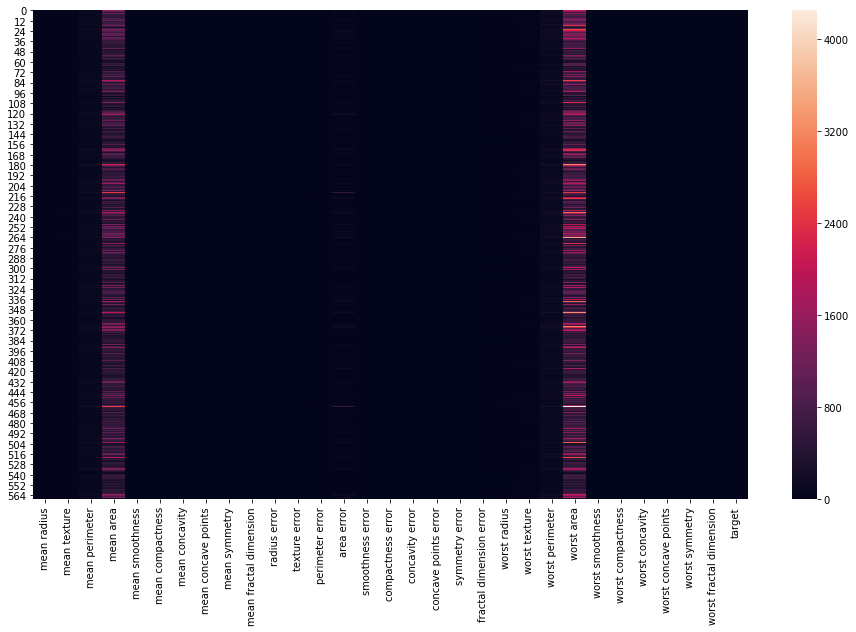

In [21]:
# heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(cancer_df) # **** img 8 ****

##  Heatmap of a correlation matrix 

In [22]:
cancer_df.corr()#gives the correlation between them

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


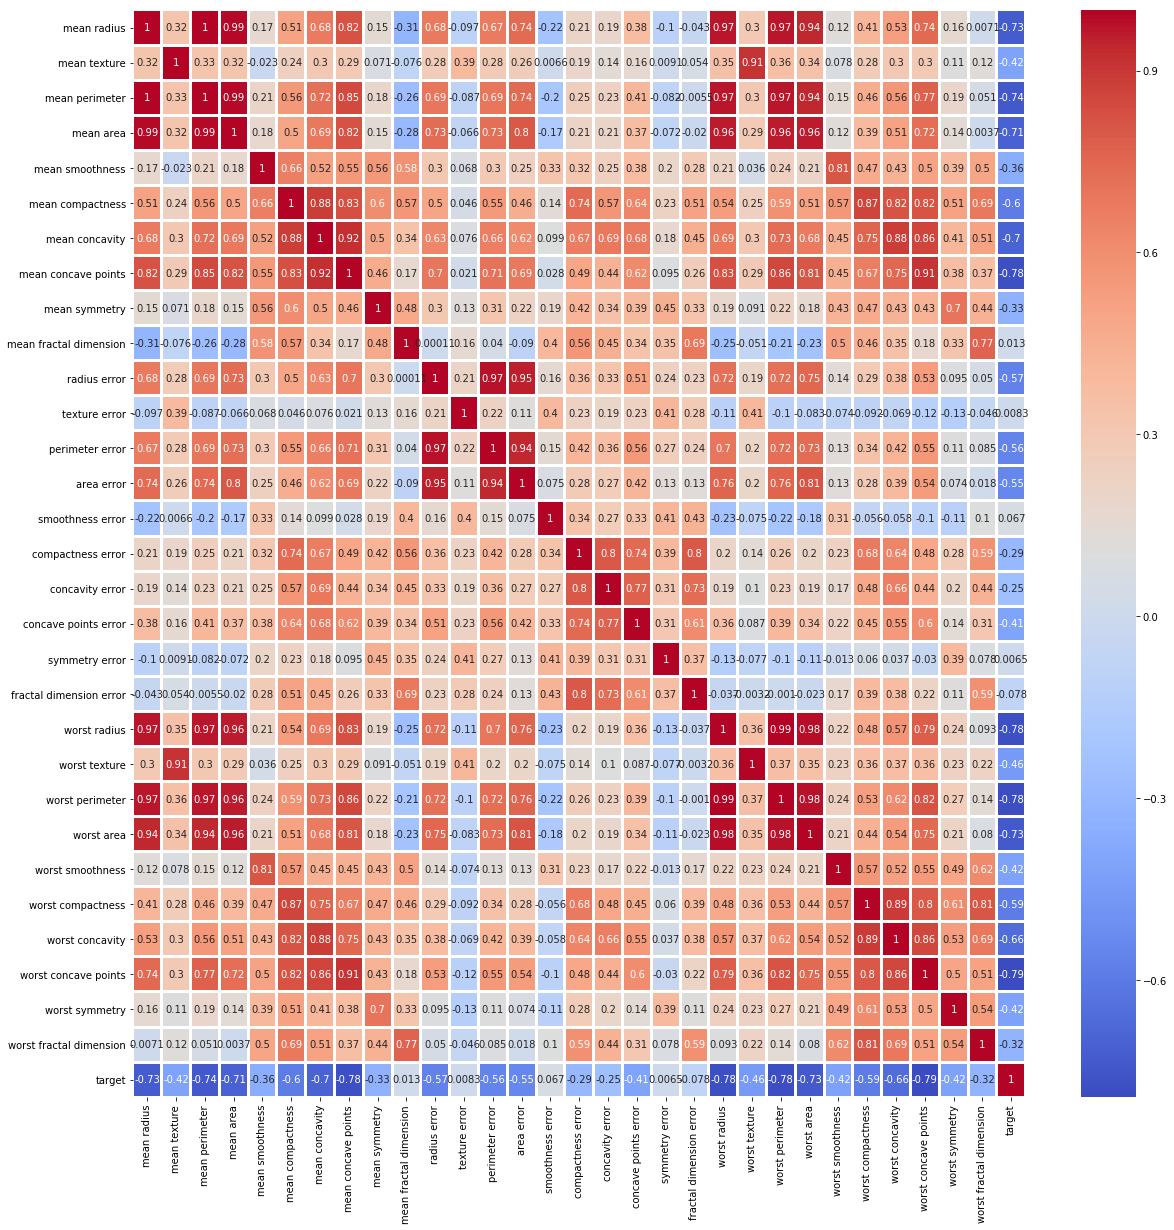

In [23]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.corr(), annot = True, cmap ='coolwarm', linewidths=2) # *** img 9 ***

# Correlation Barplot

In [24]:
# create second DataFrame by droping target
cancer_df2 = cancer_df.drop(['target'], axis = 1)
print("The shape of 'cancer_df2' is : ", cancer_df2.shape)

The shape of 'cancer_df2' is :  (569, 30)


In [25]:
#cancer_df2.corrwith(cancer_df.target)

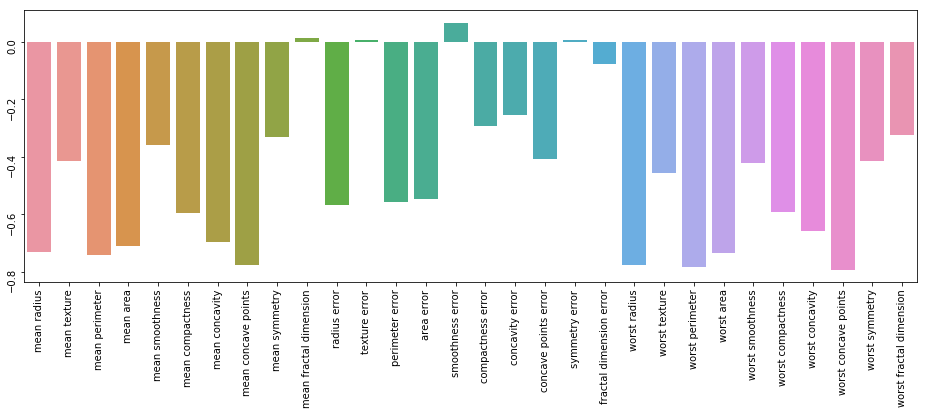

In [26]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(cancer_df2.corrwith(cancer_df.target).index, cancer_df2.corrwith(cancer_df.target))
ax.tick_params(labelrotation = 90) # **** img 10 ***

In [27]:
cancer_df2.corrwith(cancer_df.target).index

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# Split DatFrame in Train and Test

In [28]:
# input variable
X = cancer_df.drop(['target'], axis = 1) 
X.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [29]:
# output variable
y = cancer_df['target'] 
y.head(6)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: target, dtype: float64

# split dataset into train and test

In [30]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [31]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.050,36.32,85.07,521.3,0.14530,0.16220,0.18110,0.08698,0.2973,0.07745
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.760,24.70,129.10,1228.0,0.08822,0.19630,0.25350,0.09181,0.2369,0.06558
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.850,22.82,76.51,351.9,0.11430,0.36190,0.60300,0.14650,0.2597,0.12000
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.650,30.53,144.90,1417.0,0.14630,0.29680,0.34580,0.15640,0.2920,0.07614
299,10.510,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,10.930,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
312,12.760,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.025480,0.1601,0.06140,...,14.190,16.40,92.04,618.8,0.11940,0.22080,0.17690,0.08411,0.2564,0.08253
331,12.980,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,14.420,21.95,99.21,634.3,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166
317,18.220,18.87,118.70,1027.0,0.09746,0.11170,0.113000,0.079500,0.1807,0.05664,...,21.840,25.00,140.90,1485.0,0.14340,0.27630,0.38530,0.17760,0.2812,0.08198
341,9.606,16.84,61.64,280.5,0.08481,0.09228,0.084220,0.022920,0.2036,0.07125,...,10.750,23.07,71.25,353.6,0.12330,0.34160,0.43410,0.08120,0.2982,0.09825


In [32]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,0.1926,0.06540,...,20.270,36.71,149.30,1269.0,0.16410,0.61100,0.633500,0.20240,0.4027,0.09876
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.028220,0.1551,0.06761,...,13.580,28.68,87.36,553.0,0.14520,0.23380,0.168800,0.08194,0.2268,0.09082
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,0.1856,0.06402,...,15.700,15.98,102.80,745.5,0.13130,0.17880,0.256000,0.12210,0.2889,0.08006
361,13.300,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,0.05696,...,14.200,29.20,92.94,621.2,0.11400,0.16670,0.121200,0.05614,0.2637,0.06658
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,0.1976,0.06328,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.061940,0.03264,0.3059,0.07626
339,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.230800,0.141000,0.1797,0.05506,...,30.670,30.73,202.40,2906.0,0.15150,0.26780,0.481900,0.20890,0.2593,0.07738
286,11.940,20.76,77.87,441.0,0.08605,0.10110,0.065740,0.037910,0.1588,0.06766,...,13.240,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.11550,0.2465,0.09981
354,11.140,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.014710,0.1690,0.06083,...,12.120,15.82,79.62,453.5,0.08864,0.12560,0.120100,0.03922,0.2576,0.07018
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.11080,0.2827,0.09208
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.028000,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.330800,0.08978,0.2048,0.07628


In [33]:
y_train

306    1.0
410    1.0
197    0.0
376    1.0
244    0.0
299    1.0
312    1.0
331    1.0
317    0.0
341    1.0
156    0.0
71     1.0
218    0.0
344    1.0
247    1.0
212    0.0
559    1.0
176    1.0
422    1.0
248    1.0
232    1.0
444    0.0
383    1.0
279    1.0
494    1.0
316    1.0
523    1.0
90     1.0
469    1.0
373    0.0
      ... 
539    1.0
110    1.0
5      0.0
144    1.0
103    1.0
210    0.0
446    0.0
41     0.0
362    1.0
377    1.0
254    0.0
146    0.0
86     0.0
542    1.0
431    1.0
65     0.0
205    0.0
44     0.0
27     0.0
80     1.0
437    1.0
113    1.0
204    1.0
519    1.0
411    1.0
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 455, dtype: float64

In [34]:
y_test

28     0.0
163    1.0
123    1.0
361    1.0
549    1.0
339    0.0
286    1.0
354    1.0
421    1.0
124    1.0
543    1.0
537    1.0
567    0.0
555    1.0
511    1.0
333    1.0
68     1.0
189    1.0
557    1.0
436    1.0
479    0.0
52     1.0
401    1.0
355    1.0
318    1.0
359    1.0
40     0.0
323    0.0
495    1.0
45     0.0
      ... 
7      0.0
155    1.0
56     0.0
151    1.0
203    0.0
34     0.0
417    0.0
42     0.0
453    1.0
500    1.0
258    0.0
369    0.0
313    1.0
426    1.0
140    1.0
388    1.0
116    1.0
198    0.0
490    1.0
50     1.0
199    0.0
366    0.0
455    1.0
162    0.0
403    1.0
414    0.0
515    1.0
186    0.0
3      0.0
261    0.0
Name: target, Length: 114, dtype: float64

# Feature scaling 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Machine Learning Model Building

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Suppor vector Classifier

In [37]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.9385964912280702

##### Train with Standard scaled Data

In [38]:
# Train with Standard scaled Data
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.9649122807017544

# Logistic Regression

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, C=1, penalty='l1', solver='liblinear')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.956140350877193


/home/vaibhav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Train with Standard scaled Data

In [41]:
# Train with Standard scaled Data
lr_classifier2 = LogisticRegression(random_state = 51, C=1, penalty='l1', solver='liblinear')
lr_classifier2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_lr_sc)

0.6052631578947368

# Naive Bayes Classifier

In [42]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.9473684210526315

In [43]:
# Train with Standard scaled Data
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.9385964912280702

# K – Nearest Neighbor Classifier

In [44]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9385964912280702

In [45]:
# Train with Standard scaled Data
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.5789473684210527

# Decision Tree Classifier

In [46]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9473684210526315

In [47]:
# Train with Standard scaled Data
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7543859649122807

 # Random Forest Classifier

In [48]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9736842105263158

In [49]:
# Train with Standard scaled Data
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.7543859649122807

# AdaBoost Classifier

In [50]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier.fit(X_train, y_train)
y_pred_adb = adb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.9473684210526315

In [51]:
# Train with Standard scaled Data
adb_classifier2 = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier2.fit(X_train_sc, y_train)
y_pred_adb_sc = adb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_adb_sc)

0.9473684210526315

# XGBoost Classifier

In [52]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

/home/vaibhav/anaconda3/lib/python3.6/site-packages/dask/config.py:129: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


0.9824561403508771

In [53]:
# Train with Standard scaled Data
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

0.9824561403508771

 # XGBoost Parameter Tuning 
 # Randomized Search 

In [54]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [55]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=...
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [

In [56]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [57]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred_xgb_pt)

0.9824561403508771

# Grid Search

In [60]:
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(xgb_classifier, param_grid=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 4464 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 6128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8048 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 10224 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 15344 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 18288 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed:  4.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_...
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0

In [61]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
xgb_classifier_pt_gs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
       learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier_pt_gs.fit(X_train, y_train)
y_pred_xgb_pt_gs = xgb_classifier_pt_gs.predict(X_test)
accuracy_score(y_test, y_pred_xgb_pt_gs)

0.9824561403508771

# Confusion Matrix

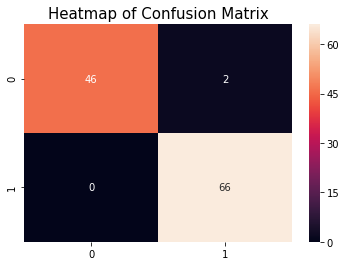

In [63]:
cm = confusion_matrix(y_test, y_pred_xgb_pt)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Classification Report Of model

In [64]:
print(classification_report(y_test, y_pred_xgb_pt))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Cross-validation of the ML model

In [65]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_classifier_pt, X = X_train_sc,y = y_train, cv = 10)
print("Cross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())

Cross validation accuracy of XGBoost model =  [0.97826087 0.97826087 0.97826087 0.97826087 0.93478261 0.91111111
 1.         1.         0.97777778 0.88888889]

Cross validation mean accuracy of XGBoost model =  0.96256038647343


# Save XGBoost Classifier model using Pickel
# Saving model for deployment

In [66]:
## Pickle
import pickle

# save model
pickle.dump(xgb_classifier_pt, open('breast_cancer_detector.pickle', 'wb'))

# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of XGBoost model = ',accuracy_score(y_test, y_pred))

Confusion matrix of XGBoost model: 
 [[46  2]
 [ 0 66]] 

Accuracy of XGBoost model =  0.9824561403508771


End ==================================================    <br>
This Project Created by https://vaibhavhariaramani.github.io/ <br>
Project Source: https://github.com/vaibhavhariaramani/Breast_Cancer_Detection_ML-with-Web-End-Deployment <br>
ML Projects: https://github.com/vaibhavhariaramani/Machine-Learning-Projects-and-Tutorials <br>
Blogs : https://vaibhavhariaramani.github.io/blogs/ <br>
Videos: https://www.youtube.com/channel/UCy7amUpLnsRLEMIaJGGBYog

============================================================================
# Made with ❤️by Vaibhav Hariramani
#### About me

I am a Machine Learning enthusiast, an Actions on Google, Internet of things, Alexa Skills, and Image processing developer.
I have a keen interest in Image processing and Andriod development.
I am Currently studying at  Chandigarh University, Punjab.

[My PortFolio](https://vaibhavhariaramani.github.io/)
You can find me at:-
[Linkedin](https://www.linkedin.com/in/vaibhav-hariramani-087488186/) or [Github](https://github.com/vaibhavhariaramani) .

Email: [vaibhav.hariramani01@gmail.com](mailto:vaibhav.hariramani01@gmail.com)




### Follow me
  
[![Linkedin Badge](https://img.shields.io/badge/-VaibhavHariramani-blue?style=flat-circle&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/vaibhav-hariramani-087488186/)](https://www.linkedin.com/in/vaibhav-hariramani-087488186/) [![Instagram Badge](https://img.shields.io/badge/-VaibhavHariramani-e02c73?style=flat-circle&labelColor=e02c73&logo=Instagram&logoColor=white&link=https://www.instagram.com/vaibhav.hariramani/?hl=en)](https://www.instagram.com/vaibhav.hariramani/?hl=en) [![Twitter Badge](https://img.shields.io/badge/-VaibhavHariramani-1ca0f1?style=flat-circle&labelColor=1ca0f1&logo=twitter&logoColor=white&link=https://twitter.com/vaibhavhariram2)](https://twitter.com/vaibhavhariram2) [![GitHub Badge](https://img.shields.io/badge/-@Vaibhavhariaramani-24292e?style=flat-circle&labelColor=24292e&logo=github&logoColor=white&link=https://github.com/vaibhavhariaramani)](https://github.com/vaibhavhariaramani) [![Gmail Badge](https://img.shields.io/badge/-VaibhavHariramani-d54b3d?style=flat-circle&labelColor=d54b3d&logo=gmail&logoColor=white&link=mailto:vaibhav.hariramani01@gmail.com)](mailto:vaibhav.hariramani01@gmail.com) [![Medium Badge](https://img.shields.io/badge/-VaibhavHariramani-d54b3d?style=flat-circle&labelColor=d54b3d&logo=medium&logoColor=white&link=https://medium.com/geeky-bawa)](https://medium.com/geeky-bawa) 

------------------------------------------------------------------------------------------------------------------------------------------------------

# Resources 

To learn more about these Resources you can Refer to some of these articles written by Me:-

- [Medium](https://medium.com/geeky-bawa)
- [geeky Traveller](https://sites.google.com/view/geeky-traveller/)
- [Blogs](https://github.com/vaibhavhariaramani/blogs)
- [Youtube](https://www.youtube.com/channel/UCy7amUpLnsRLEMIaJGGBYog)[![Youtube Badge](https://img.shields.io/badge/-Geeky_Bawa-1ca0f1?style=flat-circle&labelColor=d54b3d&logo=youtube&logoColor=white&link=https://www.youtube.com/channel/UCy7amUpLnsRLEMIaJGGBYog)](https://www.youtube.com/channel/UCy7amUpLnsRLEMIaJGGBYog)

### Don't forget to tag us

if you use this repo in  your project don't forget to mention us as Contributer in it . And Don't forget to tag us [Linkedin](https://www.linkedin.com/in/vaibhav-hariramani-087488186/),[ instagram](https://www.instagram.com/geeky_baba_/?hl=en),[ facebook](https://www.facebook.com/jayesh.hariramani.3) ,[ twitter](https://www.linkedin.com/in/vaibhav-hariramani-087488186/), [ Github](https://github.com/vaibhavhariaramani) 
